In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [7]:
titanic = sns.load_dataset("titanic")

features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

# handle missing data
imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

# encode
le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

X = titanic[features]
y = titanic["survived"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42
)


In [10]:
# Decision Tree
model = DecisionTreeClassifier(max_depth = 4)

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Training accuracy:", accuracy_score(y_train, y_pred_train)*100, "%")
print("Testing accuracy:", accuracy_score(y_test, y_pred_test)*100, "%")


Training accuracy: 84.75120385232745 %
Testing accuracy: 82.46268656716418 %


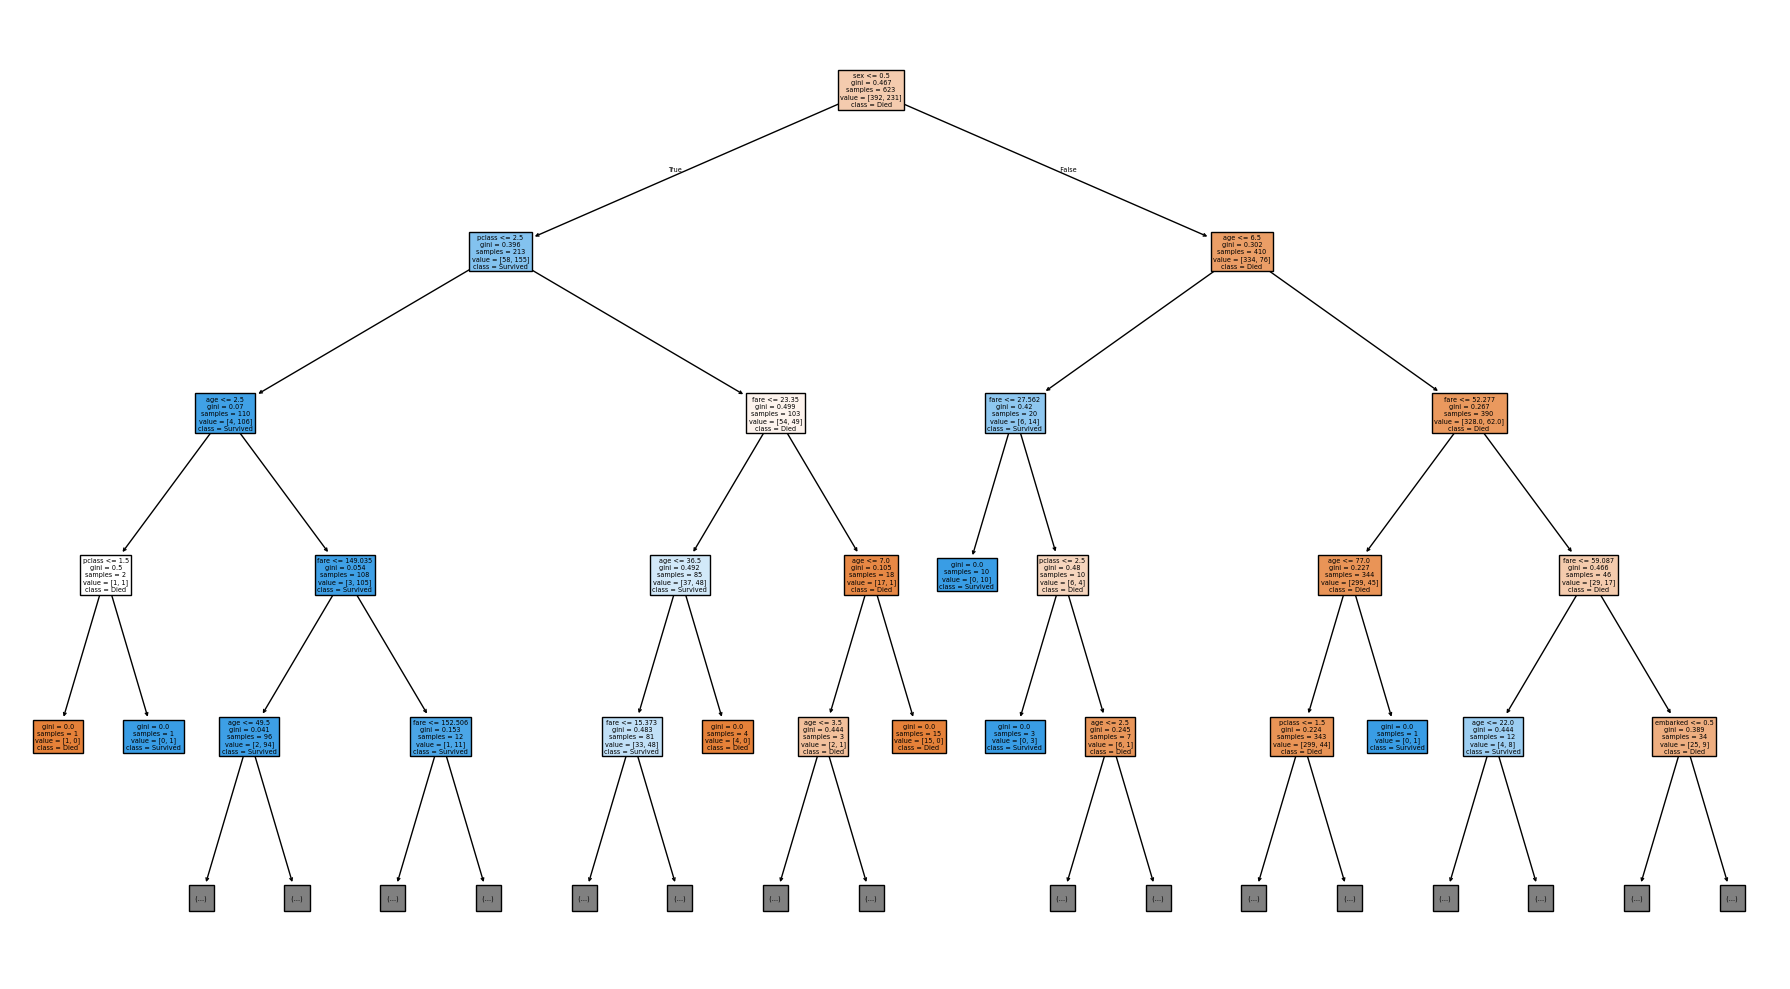

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10) )
plot_tree(
    model,
    feature_names = X.columns,
    class_names = ["Died","Survived"],
    filled = True,
    max_depth = 4
)

plt.tight_layout()
plt.show()


In [11]:
# Random forest 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 501,
    oob_score = True,
    max_depth = 4
)

model = rf.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("oob_score : ", rf.oob_score_)
print("Accuracy score : ", accuracy_score(y_test, y_pred))

oob_score :  0.8282504012841091
Accuracy score :  0.8059701492537313


In [14]:
# Bagging classifier

from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier()

bagging = BaggingClassifier(
    base_model,
    n_estimators = 201
)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
#y_pred_train = model.predict(X_train)

print("Accuracy score : ", accuracy_score(y_test, y_pred))

Accuracy score :  0.7686567164179104


In [15]:
# Bagging classifier

from sklearn.linear_model import LogisticRegression

base_model =LogisticRegression(max_iter = 1000)

bagging = BaggingClassifier(
    base_model,
    n_estimators = 201
)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
#y_pred_train = model.predict(X_train)

print("Accuracy score : ", accuracy_score(y_test, y_pred))

Accuracy score :  0.7947761194029851
